In [1]:
from preprocess import tseries
from model import model
from postprocess import forecast

In [2]:
import matplotlib.pyplot as plt
import numpy as np

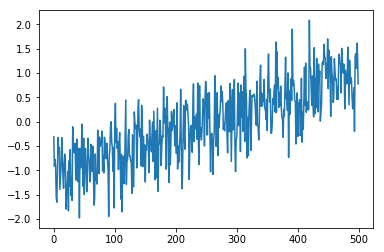

In [3]:
# Create some fake data and plot it.
y = np.array(np.linspace(-1, 1, 500) + np.random.normal(0, 0.5, 500,)) 
date = np.array(np.arange(500))
plt.show(plt.plot(date, y))

In [4]:
# Make a tseries object called "data".
data = tseries(y=y, date=date)

In [5]:
# Forecast next 100 steps using a drift model. Calculate standard errors using bootstrapped residuals.
forecast = model.drift_model(data, h=100, bootstrap=True, n_samples=5000)

In [6]:
# Show first 5 point predictions and their bounds.
np.hstack((forecast.y_lb, forecast.y_point, forecast.y_ub))[:5]

array([[-1.02028007,  0.77825276,  2.57678559],
       [-1.76307122,  0.78042881,  3.32392883],
       [-2.33252217,  0.78260485,  3.89773187],
       [-2.81224462,  0.7847809 ,  4.38180642],
       [-3.23462501,  0.78695694,  4.80853889]])

In [7]:
# Get the mean of the point predictions.# Get t 
forecast.y_point.mean()

0.8859669870497189

In [8]:
# What confidence level did we use...
forecast.model_info['level']

array([0.95])

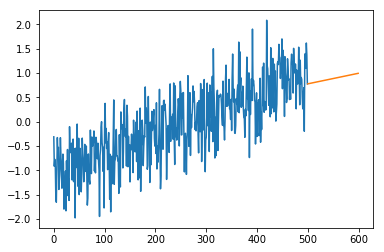

In [9]:
# Plot original series along with forecasted values.
plt.plot(np.arange(len(forecast.y_original)), forecast.y_original)
plt.plot(np.arange(len(forecast.y_original), 600, 1), forecast.y_point)
plt.show()

In [10]:
# Take the first 400 observations as training data.
y_train = tseries(y=y[:400], date=date)

In [11]:
# Set aside the remaining 100 observations as ground truth.
y_true = y[-100:]

In [12]:
# Predict the final 100 observations with a drift model.
# Get RMSE and MSE by comparing predictions to ground truth.
forecast = model.drift_model(y_train, h=len(y_true), bootstrap=True, n_samples=5000)
forecast.accuracy(y_true, ['RMSE', 'MSE'])

array([[0.52329911],
       [0.27384195]])

In [13]:
# Alternatively...
model.drift_model(y_train, h=len(y_true), bootstrap=True, n_samples=5000).accuracy(y_true, ['RMSE', 'MSE'])

array([[0.52329911],
       [0.27384195]])

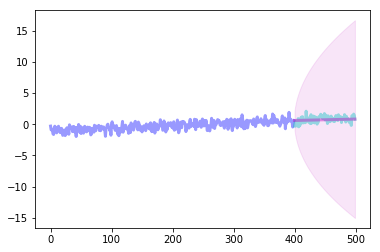

In [14]:
# Plot point y_train, y_true, y_point, and fill between y_lb and y_ub
stacked_results = np.hstack((forecast.y_lb, forecast.y_point, forecast.y_ub))
plt.plot(np.arange(0, 400, 1), forecast.y_original, linewidth=3, color='b', alpha=.4)
plt.plot(np.arange(400, 500, 1), y_true, linewidth=3, color='c', alpha=.4)
plt.plot(np.arange(400, 500, 1), stacked_results[:, 1], linewidth=3, color='m', alpha=0.4)
plt.fill_between(np.arange(400, 500, 1), stacked_results[:, 0], stacked_results[:, 2], color='m', alpha=.1)
plt.show()